 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
w_ret = pd.read_csv('whale_returns.csv')
w_ret

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,3/03/2015,-0.001266,-0.004981,-0.000496,-0.006569
1,4/03/2015,0.002230,0.003241,-0.002534,0.004213
2,5/03/2015,0.004016,0.004076,0.002355,0.006726
3,6/03/2015,-0.007905,-0.003574,-0.008481,-0.013098
4,9/03/2015,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1048,16/04/2019,0.002699,0.000388,-0.000831,0.000837
1049,17/04/2019,-0.002897,-0.006467,-0.004409,0.003222
1050,18/04/2019,0.001448,0.001222,0.000582,0.001916
1051,22/04/2019,-0.002586,-0.007333,-0.003640,-0.001088


In [3]:
# Count nulls


In [4]:
# Drop nulls


In [5]:
# change date to index
w_ret2 = w_ret.set_index(['Date'])
w_ret2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
3/03/2015,-0.001266,-0.004981,-0.000496,-0.006569
4/03/2015,0.002230,0.003241,-0.002534,0.004213
5/03/2015,0.004016,0.004076,0.002355,0.006726
6/03/2015,-0.007905,-0.003574,-0.008481,-0.013098
9/03/2015,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
16/04/2019,0.002699,0.000388,-0.000831,0.000837
17/04/2019,-0.002897,-0.006467,-0.004409,0.003222
18/04/2019,0.001448,0.001222,0.000582,0.001916


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo = pd.read_csv('algo_returns.csv')
algo

,Date,Algo 1,Algo 2
0,2/03/2015,-0.008158,0.003200
1,3/03/2015,-0.001942,-0.000949
2,4/03/2015,-0.008589,0.002416
3,5/03/2015,-0.000955,0.004323
4,6/03/2015,-0.004957,-0.011460
...,...,...,...
1039,16/04/2019,-0.006945,0.002899
1040,17/04/2019,-0.010301,-0.005228
1041,18/04/2019,-0.000588,-0.001229
1042,22/04/2019,0.000677,-0.001936


In [7]:
# Count nulls


In [8]:
# Drop nulls


In [9]:
# change date to index
algo2 = algo.set_index(['Date'])
algo2

,Algo 1,Algo 2
Date,,
2/03/2015,-0.008158,0.003200
3/03/2015,-0.001942,-0.000949
4/03/2015,-0.008589,0.002416
5/03/2015,-0.000955,0.004323
6/03/2015,-0.004957,-0.011460
...,...,...
16/04/2019,-0.006945,0.002899
17/04/2019,-0.010301,-0.005228
18/04/2019,-0.000588,-0.001229


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500 = pd.read_csv('sp500_history.csv')
sp500

,Date,Close
0,2/03/2015,0.006125
1,3/03/2015,-0.004539
2,4/03/2015,-0.004389
3,5/03/2015,0.001196
4,6/03/2015,-0.014174
...,...,...
1039,16/04/2019,0.000509
1040,17/04/2019,-0.002274
1041,18/04/2019,0.001579
1042,22/04/2019,0.001012


In [11]:
# Check Data Types
sp500.dtypes

Date      object
Close    float64
dtype: object

In [12]:
# Fix Data Types


In [13]:
# Calculate Daily Returns

In [14]:
# Drop nulls


In [15]:
# Rename `Close` Column to be specific to this portfolio.


In [16]:
# change date to index
sp500_2 = sp500.set_index(['Date'])
sp500_2

,Close
Date,
2/03/2015,0.006125
3/03/2015,-0.004539
4/03/2015,-0.004389
5/03/2015,0.001196
6/03/2015,-0.014174
...,...
16/04/2019,0.000509
17/04/2019,-0.002274
18/04/2019,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
comret = pd.concat([sp500_2, algo2, w_ret2], axis = 'columns', join = 'inner')
comret2 = comret.dropna()
comret2

,Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
3/03/2015,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
4/03/2015,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
5/03/2015,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
6/03/2015,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
9/03/2015,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
16/04/2019,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
17/04/2019,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
18/04/2019,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

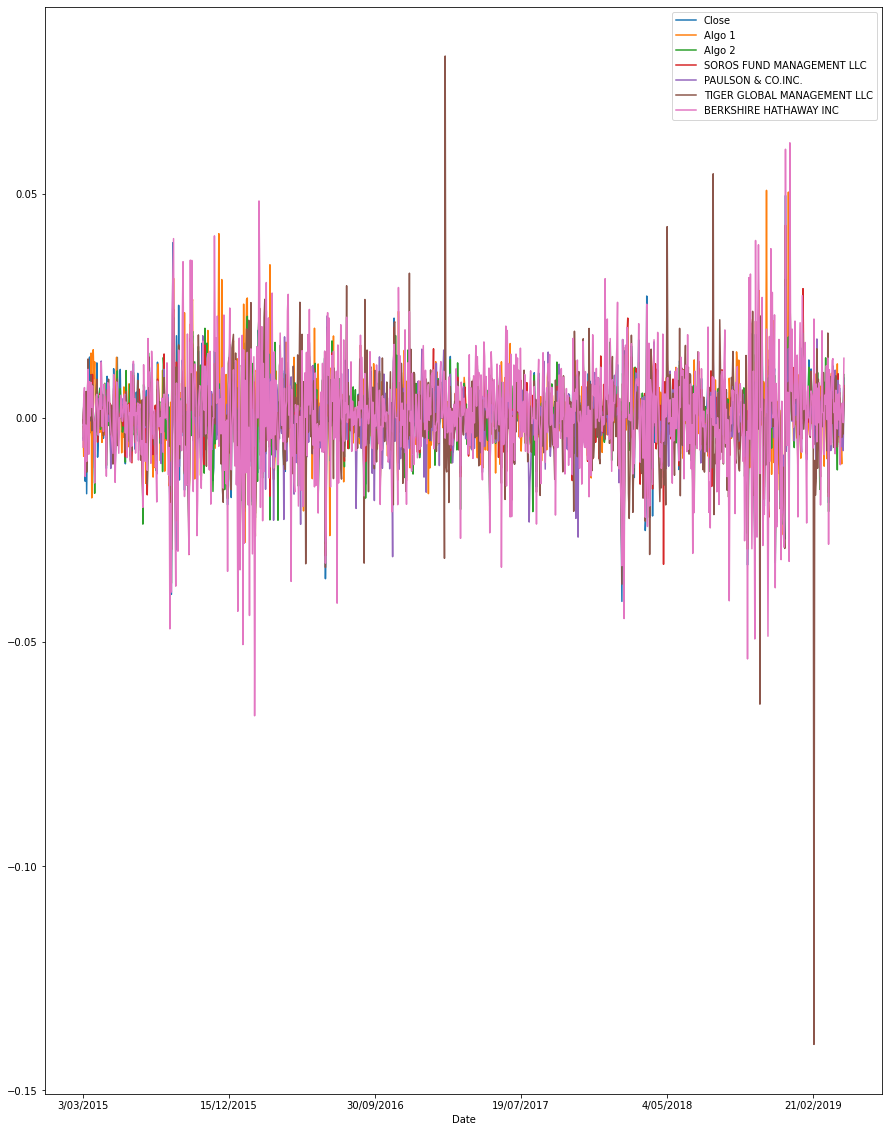

In [18]:
# Plot daily returns of all portfolios
comret2.plot(figsize=(15,20), legend=True)

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of Portfolios'}, xlabel='Date'>

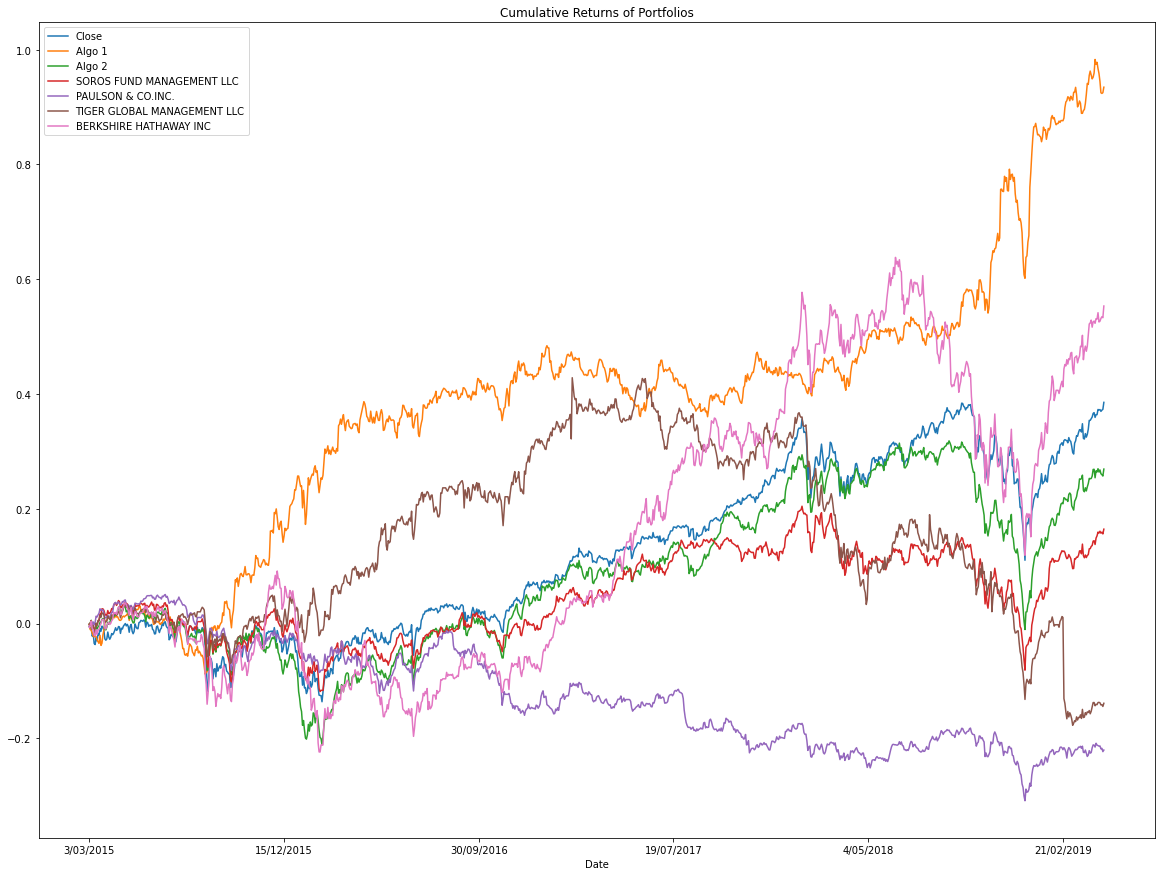

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+ comret2).cumprod() -1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,15), title="Cumulative Returns of Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

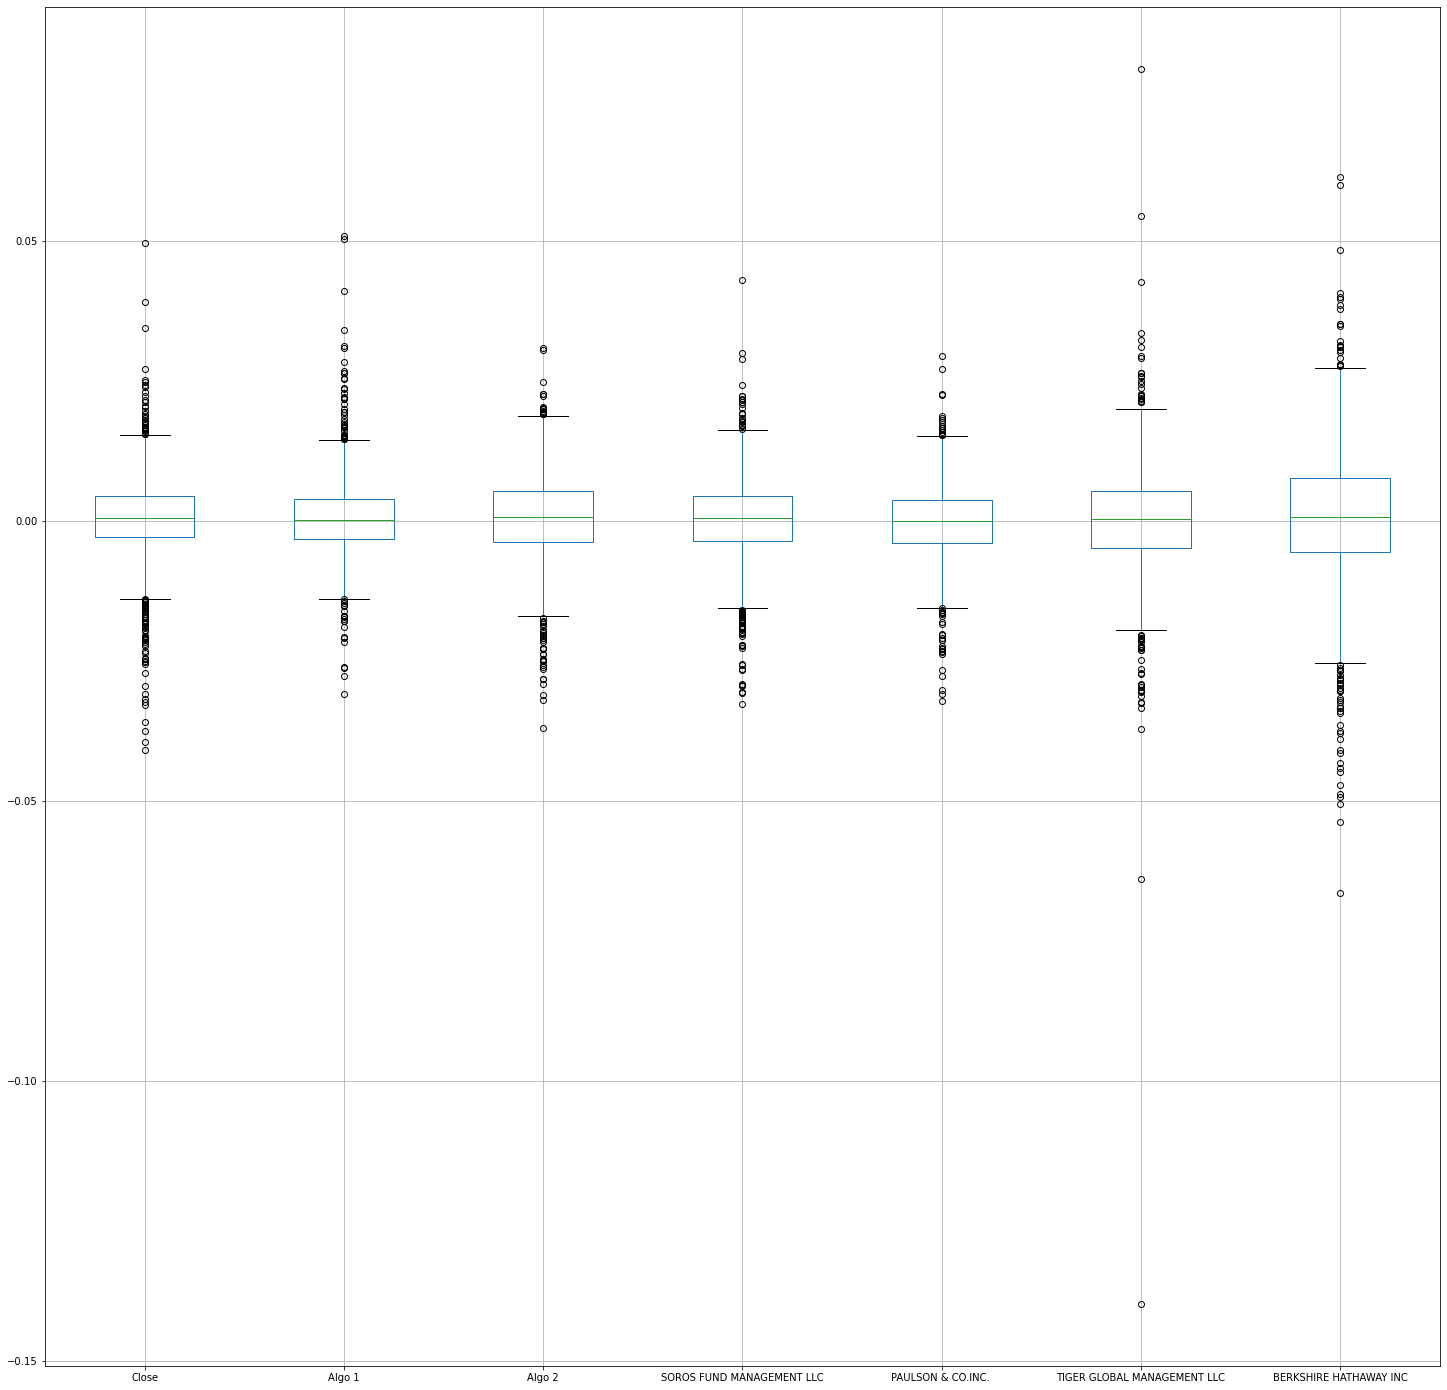

In [20]:
# Box plot to visually show risk
comret2.boxplot(figsize= (25,25))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
comret2.std()

Close                          0.008554
Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
comret2['Close'].std()
# Determine which portfolios are riskier than the S&P 500
portfolios = comret2.columns.values.tolist()
for portfolio in portfolios:
    if comret2[portfolio].std() > comret2['Close'].std():
        print (f"{portfolio} portfolio is riskier than the S&P 500 portfolio")
    else:
        pass

TIGER GLOBAL MANAGEMENT LLC portfolio is riskier than the S&P 500 portfolio
BERKSHIRE HATHAWAY INC portfolio is riskier than the S&P 500 portfolio


### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
comret2.std()* np.sqrt(252)

Close                          0.135786
Algo 1                         0.120967
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

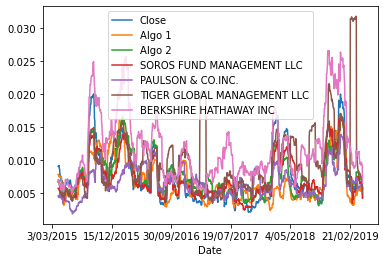

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
comret2.rolling(window = 21).std()

# Plot the rolling standard deviation
comret2.rolling(window = 21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

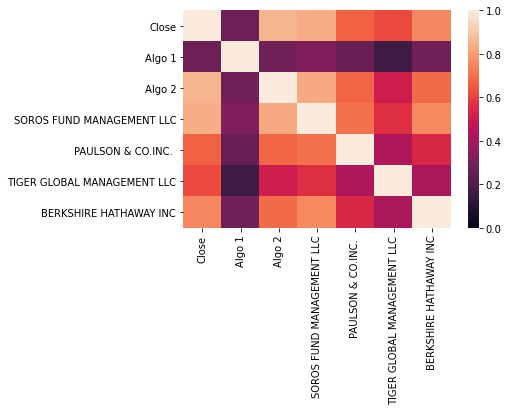

In [25]:
# Calculate the correlation
portfolio_correlation = comret2.corr()
# Display de correlation matrix
import seaborn as sns
sns.heatmap(portfolio_correlation, vmin=0, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [26]:
# Calculate covariance of a single portfolio
covariance_berkshire = comret2['BERKSHIRE HATHAWAY INC'].cov(comret2['Close'])
covariance_berkshire
# Calculate variance of S&P 500
variance_sp500 = comret2['Close'].var()
# Computing beta
berkshire_beta = covariance_berkshire / variance_sp500
berkshire_beta


1.1347891087968378

In [27]:
# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [28]:
# Use `ewm` to calculate the rolling window
comret2.ewm(halflife = 21).mean()

,Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
3/03/2015,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
4/03/2015,-0.004462,-0.005320,0.000761,0.000511,-0.000802,-0.001532,-0.001089
5/03/2015,-0.002514,-0.003817,0.001988,0.001718,0.000878,-0.000193,0.001603
6/03/2015,-0.005575,-0.004116,-0.001542,-0.000808,-0.000291,-0.002369,-0.002256
9/03/2015,-0.003543,-0.004400,-0.000935,-0.000511,0.000673,-0.000616,-0.002128
...,...,...,...,...,...,...,...
16/04/2019,0.001352,0.000912,0.001364,0.001480,0.000448,-0.000813,0.001862
17/04/2019,0.001234,0.000548,0.001150,0.001338,0.000223,-0.000930,0.001906
18/04/2019,0.001246,0.000511,0.001073,0.001341,0.000256,-0.000881,0.001907


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratio = comret2.mean()/comret2.std()
annualized_sharpe_ratio = sharpe_ratio * (252**.5)
annualized_sharpe_ratio

Close                          0.648267
Algo 1                         1.378649
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
dtype: float64

<AxesSubplot:>

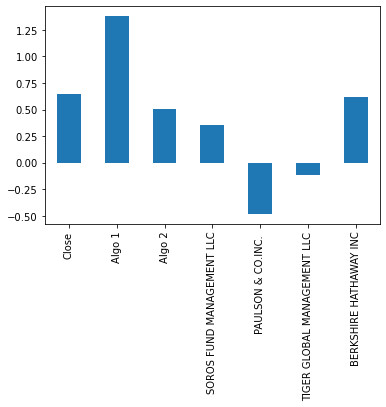

In [30]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---As the mean expected return of the algorithmic strategies comes to 0.23 for every dollar invested, it outperforms the market as well as the whales portfolios. Algorithmic strategy 1 even proves to be the least volatile compared to the other portfolios according to its sharpe ratios. The mean sharpe ratio of the algorithmic strategies are also higher than the markets and whales portfolios making it the more attractive option in these selection of portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [31]:
# Reading data from 1st stock
emn = pd.read_csv("EMN.V.csv")
emn_close = emn.drop(columns=['Open','High','Low','Adj Close','Volume'])
emn_close = emn_close.set_index(['Date'])
emn_close

,Close
Date,
2020-08-31,0.060
2020-09-01,0.060
2020-09-02,0.065
2020-09-03,0.065
2020-09-04,0.070
...,...
2021-08-23,0.630
2021-08-24,0.630
2021-08-25,0.620


In [32]:
# Reading data from 2nd stock
gtr = pd.read_csv("GTR.AX.csv")
gtr_close = gtr.drop(columns=['Open','High','Low','Adj Close','Volume'])
gtr_close = gtr_close.set_index(['Date'])
gtr_close

,Close
Date,
2020-08-31,0.028
2020-09-01,0.028
2020-09-02,0.026
2020-09-03,0.026
2020-09-04,0.024
...,...
2021-08-23,0.019
2021-08-24,0.019
2021-08-25,0.019


In [33]:
# Reading data from 3rd stock
pwh = pd.read_csv("PWH.AX.csv")
pwh_close = pwh.drop(columns=['Open','High','Low','Adj Close','Volume'])
pwh_close = pwh_close.set_index(['Date'])
pwh_close

,Close
Date,
2020-08-31,4.90
2020-09-01,5.15
2020-09-02,5.06
2020-09-03,4.96
2020-09-04,4.91
...,...
2021-08-23,7.91
2021-08-24,8.24
2021-08-25,8.36


In [34]:
# Combine all stocks in a single DataFrame
hist_data = pd.concat([emn_close,gtr_close,pwh_close], axis = 'columns', join = 'inner')
hist_data

,Close,Close,Close
Date,,,
2020-08-31,0.060,0.028,4.90
2020-09-01,0.060,0.028,5.15
2020-09-02,0.065,0.026,5.06
2020-09-03,0.065,0.026,4.96
2020-09-04,0.070,0.024,4.91
...,...,...,...
2021-08-23,0.630,0.019,7.91
2021-08-24,0.630,0.019,8.24
2021-08-25,0.620,0.019,8.36


In [35]:
# Reset Date index


In [36]:
# Reorganize portfolio data by having a column per symbol
ticker = ['emn','gtr','pwh']
hist_data.columns = ticker
hist_data

,emn,gtr,pwh
Date,,,
2020-08-31,0.060,0.028,4.90
2020-09-01,0.060,0.028,5.15
2020-09-02,0.065,0.026,5.06
2020-09-03,0.065,0.026,4.96
2020-09-04,0.070,0.024,4.91
...,...,...,...
2021-08-23,0.630,0.019,7.91
2021-08-24,0.630,0.019,8.24
2021-08-25,0.620,0.019,8.36


In [37]:
# Calculate daily returns
hist_data.pct_change()
# Drop NAs
hist_data = hist_data.pct_change().dropna()
# Display sample data
hist_data

,emn,gtr,pwh
Date,,,
2020-09-01,0.000000,0.000000,0.051020
2020-09-02,0.083333,-0.071429,-0.017476
2020-09-03,0.000000,0.000000,-0.019763
2020-09-04,0.076923,-0.076923,-0.010081
2020-09-08,0.000000,0.041667,-0.042770
...,...,...,...
2021-08-23,0.016129,0.055556,0.061745
2021-08-24,0.000000,0.000000,0.041719
2021-08-25,-0.015873,0.000000,0.014563


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = weights * hist_data
portfolio_return = weighted_returns.sum(axis = 1)
# Display sample data
portfolio_return

Date
2020-09-01    0.017007
2020-09-02   -0.001857
2020-09-03   -0.006588
2020-09-04   -0.003360
2020-09-08   -0.000368
                ...   
2021-08-23    0.044477
2021-08-24    0.013906
2021-08-25   -0.000437
2021-08-26    0.005196
2021-08-27   -0.002404
Length: 246, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
#comret2['Custom'] = portfolio_return
comret2

,Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
3/03/2015,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
4/03/2015,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
5/03/2015,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
6/03/2015,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
9/03/2015,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
16/04/2019,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
17/04/2019,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
18/04/2019,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
comret2.dropna(inplace = True)
comret2

,Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
3/03/2015,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
4/03/2015,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
5/03/2015,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
6/03/2015,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
9/03/2015,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
16/04/2019,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
17/04/2019,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
18/04/2019,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std` (dates did not line up for custom portfolio, went rogue and just looked at my 3 chosen stocks)
hist_data.std()*(252**.5)

emn    1.298314
gtr    0.966285
pwh    0.322943
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

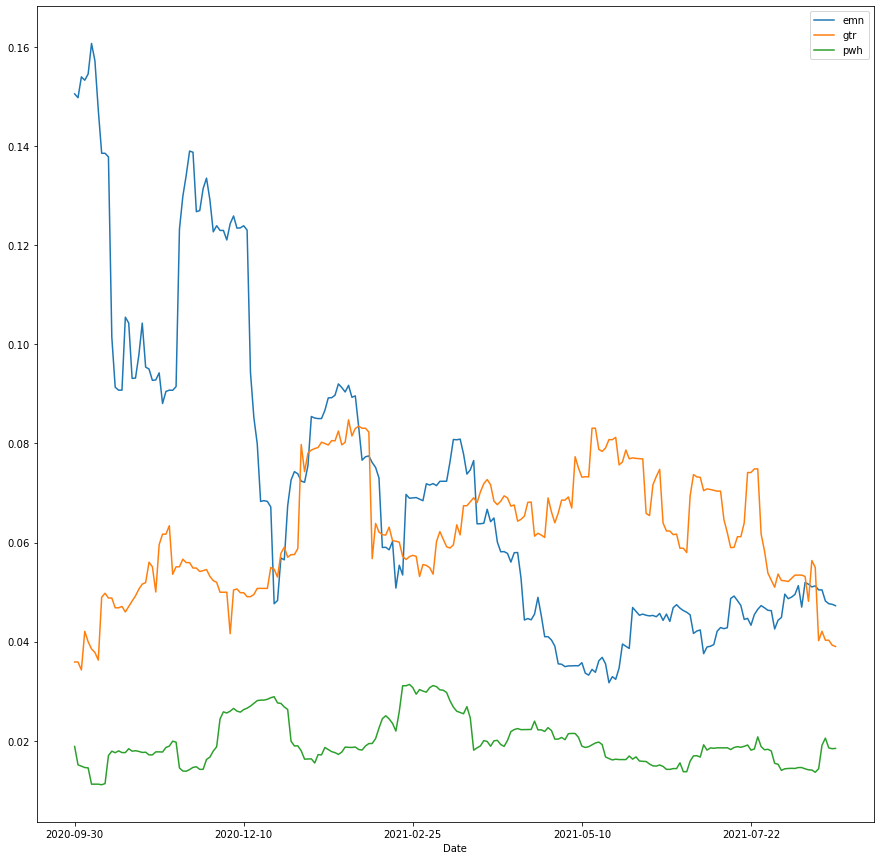

In [42]:
# Calculate rolling standard deviation
hist_data.rolling(window = 21).std()
# Plot rolling standard deviation
hist_data.rolling(window = 21).std().dropna().plot(figsize=(15,15))

### Calculate and plot the correlation

<AxesSubplot:>

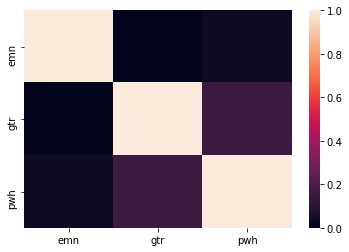

In [43]:
# Calculate and plot the correlation
hist_data_corr = hist_data.corr()
sns.heatmap(hist_data_corr,vmin=0,vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [52]:
# Calculate and plot Beta
custom_rolling_cov = hist_data.rolling(window=60).cov(comret2['Close'])
market_rolling_var = comret2['Close'].rolling(window=60).var()
custom_rolling_beta = custom_rolling_cov / market_rolling_var
print(custom_rolling_cov)

            emn  gtr  pwh
Date                     
2020-09-01  NaN  NaN  NaN
2020-09-02  NaN  NaN  NaN
2020-09-03  NaN  NaN  NaN
2020-09-04  NaN  NaN  NaN
2020-09-08  NaN  NaN  NaN
...         ...  ...  ...
2021-08-23  NaN  NaN  NaN
2021-08-24  NaN  NaN  NaN
2021-08-25  NaN  NaN  NaN
2021-08-26  NaN  NaN  NaN
2021-08-27  NaN  NaN  NaN

[246 rows x 3 columns]


In [45]:
print(comret2)

               Close    Algo 1    Algo 2  SOROS FUND MANAGEMENT LLC  \
Date                                                                  
3/03/2015  -0.004539 -0.001942 -0.000949                  -0.001266   
4/03/2015  -0.004389 -0.008589  0.002416                   0.002230   
5/03/2015   0.001196 -0.000955  0.004323                   0.004016   
6/03/2015  -0.014174 -0.004957 -0.011460                  -0.007905   
9/03/2015   0.003944 -0.005447  0.001303                   0.000582   
...              ...       ...       ...                        ...   
16/04/2019  0.000509 -0.006945  0.002899                   0.002699   
17/04/2019 -0.002274 -0.010301 -0.005228                  -0.002897   
18/04/2019  0.001579 -0.000588 -0.001229                   0.001448   
22/04/2019  0.001012  0.000677 -0.001936                  -0.002586   
23/04/2019  0.008841  0.004969  0.009622                   0.007167   

            PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
Date         

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [46]:
# Calculate Annualzied Sharpe Ratios
new_sharpe_ratios = comret2.mean() / comret2.std()
new_annualised_sharpe_ratios = new_sharpe_ratios * (252**.5)
new_annualised_sharpe_ratios
#Perfect!!!!

Close                          0.648267
Algo 1                         1.378649
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
dtype: float64

<AxesSubplot:>

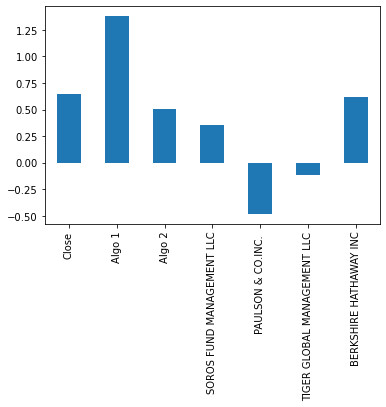

In [47]:
# Visualize the sharpe ratios as a bar plot
new_annualised_sharpe_ratios.plot.bar()
# A lot can be concluded from this bar plot

### How does your portfolio do?

Write your answer here!

In [48]:
#Anything is possible. 